#### PRNG evolution analysis with prediction attacks

In [1]:
#Basic imports for now

# NN-Tools
import numpy as np 
import keras 

# Visualization
from IPython.display import SVG 
from IPython.display import display
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# Printing
from sympy import *
init_printing(use_latex=True)

# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [15]:
from PRNGs import *
from SeedGenerator import *
import time

x_train = []
y_train = []


x_test = []
y_test = []

def split_data(x,y, numsets, setlength):
    temp = []
    for i in range(numsets):
        t = ticks()
        temp = Middle_Square(t,setlength)
        for a in range(len(temp)):
            temp[a] = int(temp[a])
        n = temp[-1]
        y.append(n)
        x.append(temp[:-1])
             

split_data(x_train, y_train, 500, 1000)
x_train = np.array(x_train)
y_train = np.array(y_train)

split_data(x_test, y_test, 500, 1000)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)


print(x_train.shape)
print(y_train)
#print(y_train.shape)

#print(x_test.shape)
#print(y_test.shape)


(500, 999, 1)
[1289468076106719173646 1514931761581815331176 25239667299216193810
 6139281543742180680128 7265592899876209625482 6008408012606781074439
 7015359338503353141353 5179789406659106531391 4287580669255044914705
 7711379492688840923686 9711099301099858424112 1193231595021142622074
 2374815161642952243539 4088498294907097113600 6489947331756344988073
 7557486626063204996264 5052784922681466116586 2293102405257116332201
 4211972074405260763535 7307224858948951079642 9978500762451513867795
 33929341591663264469 4797170560279851366678 17092486872711368773
 42768617378640383544 7601753977013420669000 675472061175635152070
 3140458889729114131022 5809505722119717480129 164693206825531722789
 5032609283687849343527 86814363944179228889 6282458281719195548948
 7174812461754380803413 3597793045084313958425 845230326119716581668
 8874791401092704798453 4318523943681076668126 6204070497406569656290
 8525003897320751390 5358298426176991148228 7343363363686775287929
 330181590569831095046

In [13]:
def adversary(input_width, output_width):
    """ Returns a keras sequential model.
    :param input_width: the size of the input layer
    :param output_width: the size of the output layer
    :return:
    """
    model = keras.Sequential()
    model.add(keras.layers.Conv1D(500, kernel_size=2,
                                activation='relu',
                                input_shape=(input_width, 1),
                                name='conv_1'
                             )
         )
    model.add(keras.layers.Conv1D(100, 10, activation='relu', name='conv_2'))
    model.add(keras.layers.Conv1D(50, 20, activation='relu', name='conv_3'))
    model.add(keras.layers.Conv1D(20, 50, activation='relu', name='conv_4'))
    model.add(keras.layers.MaxPool1D(1, 1, name='maxpool_1'))
    model.add(keras.layers.Flatten(name='flatten_1'))
    model.add(keras.layers.Dense(4, activation='relu', name='dense_1'))
    model.add(keras.layers.Dense(output_width, activation='relu', name='dense_2'))
    
    return model

mod = adversary(999,1)
          
mod.compile(loss='sparse_categorical_crossentropy', optimizer='adam', #https://jovianlin.io/cat-crossentropy-vs-sparse-cat-crossentropy/
    metrics=['accuracy'])
mod.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv1D)              (None, 998, 500)          1500      
_________________________________________________________________
conv_2 (Conv1D)              (None, 989, 100)          500100    
_________________________________________________________________
conv_3 (Conv1D)              (None, 970, 50)           100050    
_________________________________________________________________
conv_4 (Conv1D)              (None, 921, 20)           50020     
_________________________________________________________________
maxpool_1 (MaxPooling1D)     (None, 921, 20)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18420)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                

In [14]:
batch_size=5
epochs=5
history=mod.fit(x_train,y_train,batch_size=batch_size,epochs=epochs, validation_split=.3,verbose=1, validation_data=(x_test, y_test))

Train on 500 samples, validate on 500 samples
Epoch 1/5


InvalidArgumentError:  Received a label value of -9223372036854775808 which is outside the valid range of [0, 1).  Label values: -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808 -9223372036854775808
	 [[node loss_4/dense_2_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_12556]

Function call stack:
keras_scratch_graph


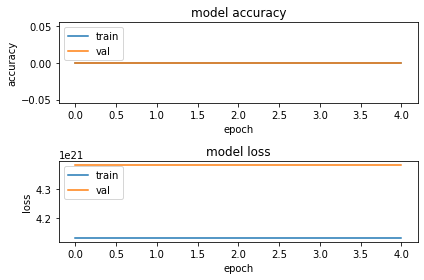

In [5]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
# summarize history for loss  
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.tight_layout()
plt.show()

In [6]:
mod.predict(x_train)

array([[0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],
       [0.7328148],


In [ ]:


import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Reshape
'''
#initially using fewer kernels and increasing gradually while monitoring the error rate on how it is varying
model = keras.Sequential()
model.add(Reshape((x.shape[1], 1), input_shape=(x.shape[1], )))
model.add(keras.layers.Conv1D(98, kernel_size=2,
                                activation='relu',
                                input_shape=(1,98)
                             )
         )
        
        
#data work in progress
          
model.add(keras.layers.Conv1D(64, 2, activation='relu'))
model.add(keras.layers.Conv1D(64, 2, activation='relu'))
model.add(keras.layers.Conv1D(64, 2, activation='relu'))

#test pool size and monitor what works better

model.add(keras.layers.MaxPooling1D(pool_size=(4)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(4, activation='relu'))
model.add(keras.layers.Dropout(0.5))
          
          
model.add(keras.layers.Dense(1, activation='softmax'))
          
    #data work in progress
          
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy'])
          
model.summary()
          
'''    
